# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [2]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verificar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [12]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution,g):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            g.add_node(node.data,color='red')
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
                    g.add_edge(node.data,child)
                    if child.on_list(visited_nodes):
                        g.add_node(node.data,color='red')
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Cuenca'
    solution = 'Machala'
    solution_node = search_Amplitud_solution(connections, init_state, solution,Grafo)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Cuenca', 'Guayaquil', 'Machala']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Agregar la solucion en markdown (Informe)
a). Asumir que el factor de ramificación es constante.

Si se asume que el factor de ramificacion es constante, y se tiene que n es igual a 24, y dice que cuando es  constante el valor de profundidad d es igual a n, entonces tenemos:

${n=4}$ -> total de nodos

${d=16}$ -> profundidad

b). Despejar el valor de b.

$${n} = \frac{b^{d+1}-1}{b-1}$$


$${4} = \frac{b^{16+1}-1}{b-1}$$

$${4} = \frac{b^{17}-1}{b-1}$$

Al resolver esto aparte tenemos que b vale aproximadamente:


$${b} = {0.75196}$$

Rta. El factor de ramificación es igual a ${0.75196}$, para las 4 reinas.

c). Consultar sitios externos sobre cómo realizar el cálculo.

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.


Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

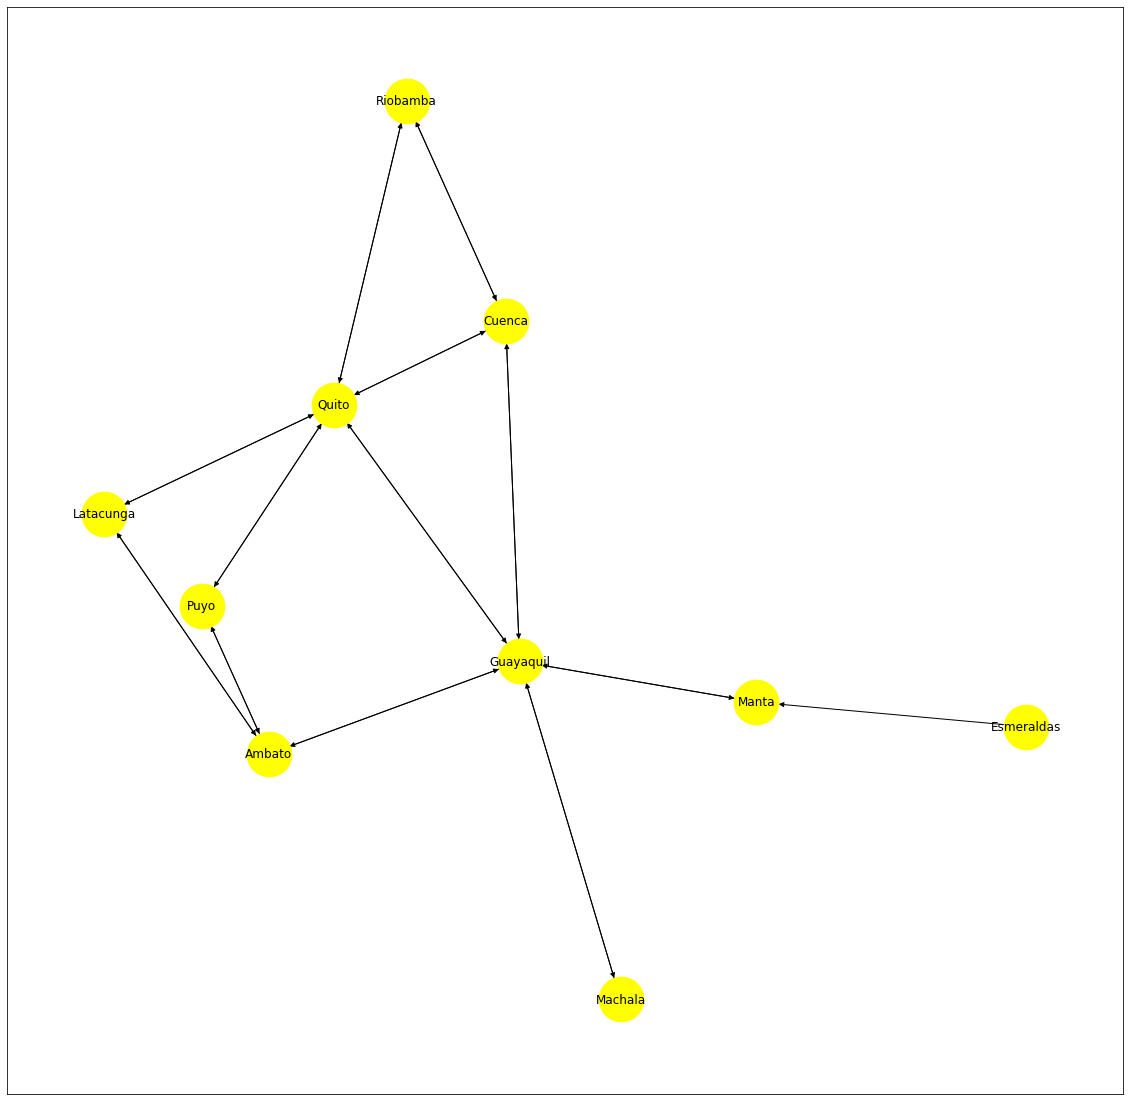

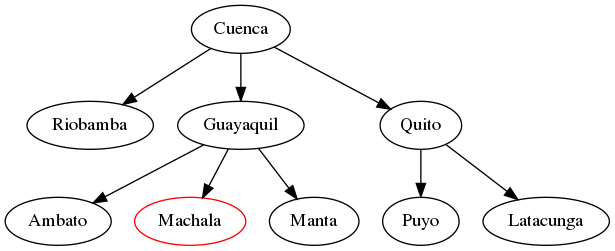

In [13]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:  
            graf.add_edge(valor,a,size=250)
    
    plt.figure(figsize=(20,20)) 
    nx.draw_networkx(graf, node_color = 'yellow', with_label = True, node_size=2000)
    plt.show()

def graficarRes(grafo):
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    view_pydot(p)
    
graficar(connections)
graficarRes(Grafo)

Imagen de los hospitales con respecto a mi casa:
<img src="oficial.PNG">

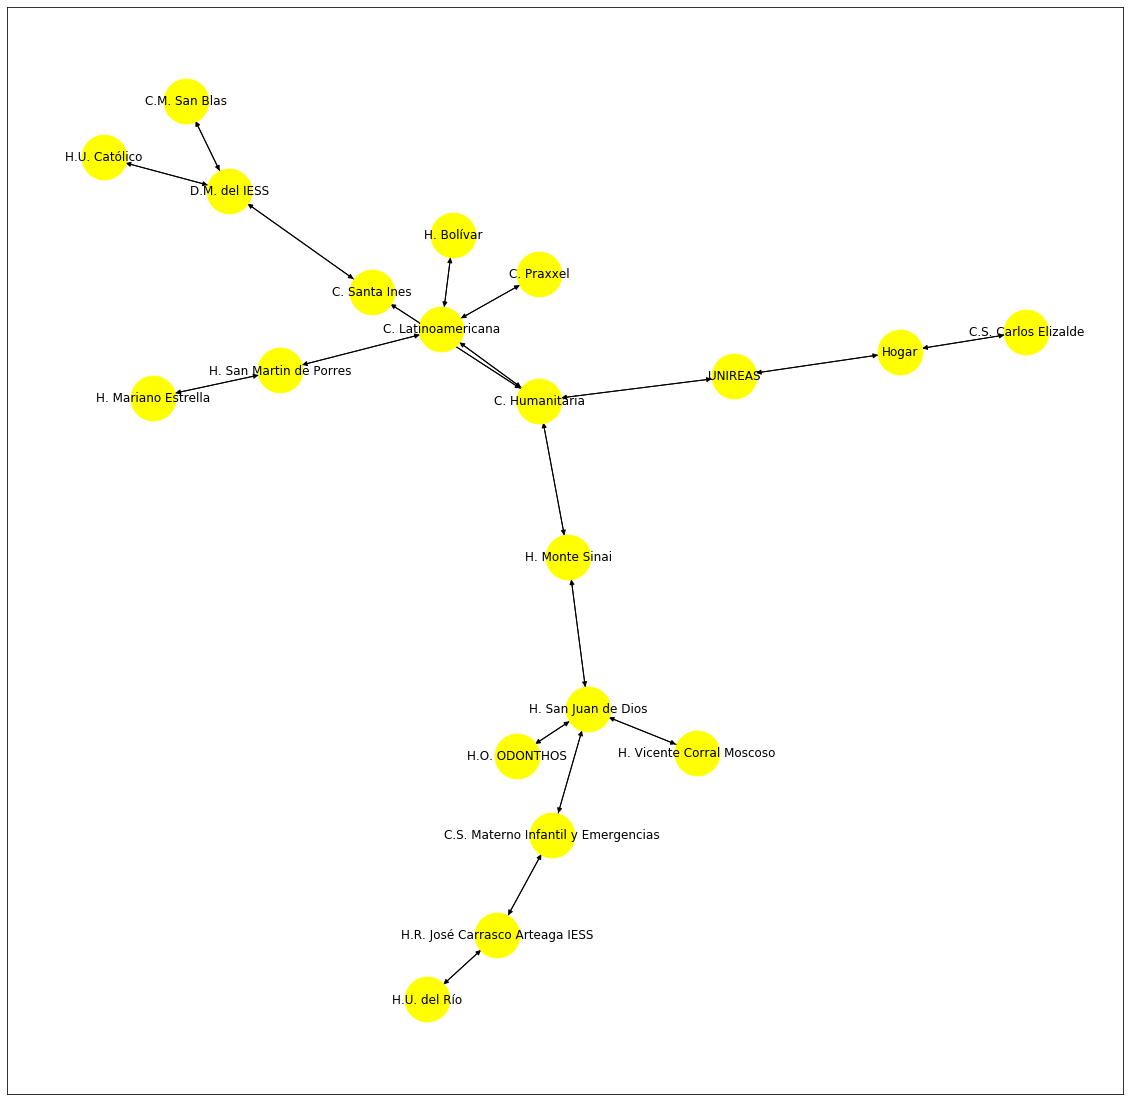

['Hogar', 'UNIREAS', 'C. Humanitaria', 'H. Monte Sinai', 'H. San Juan de Dios', 'C.S. Materno Infantil y Emergencias', 'H.R. José Carrasco Arteaga IESS', 'H.U. del Río']


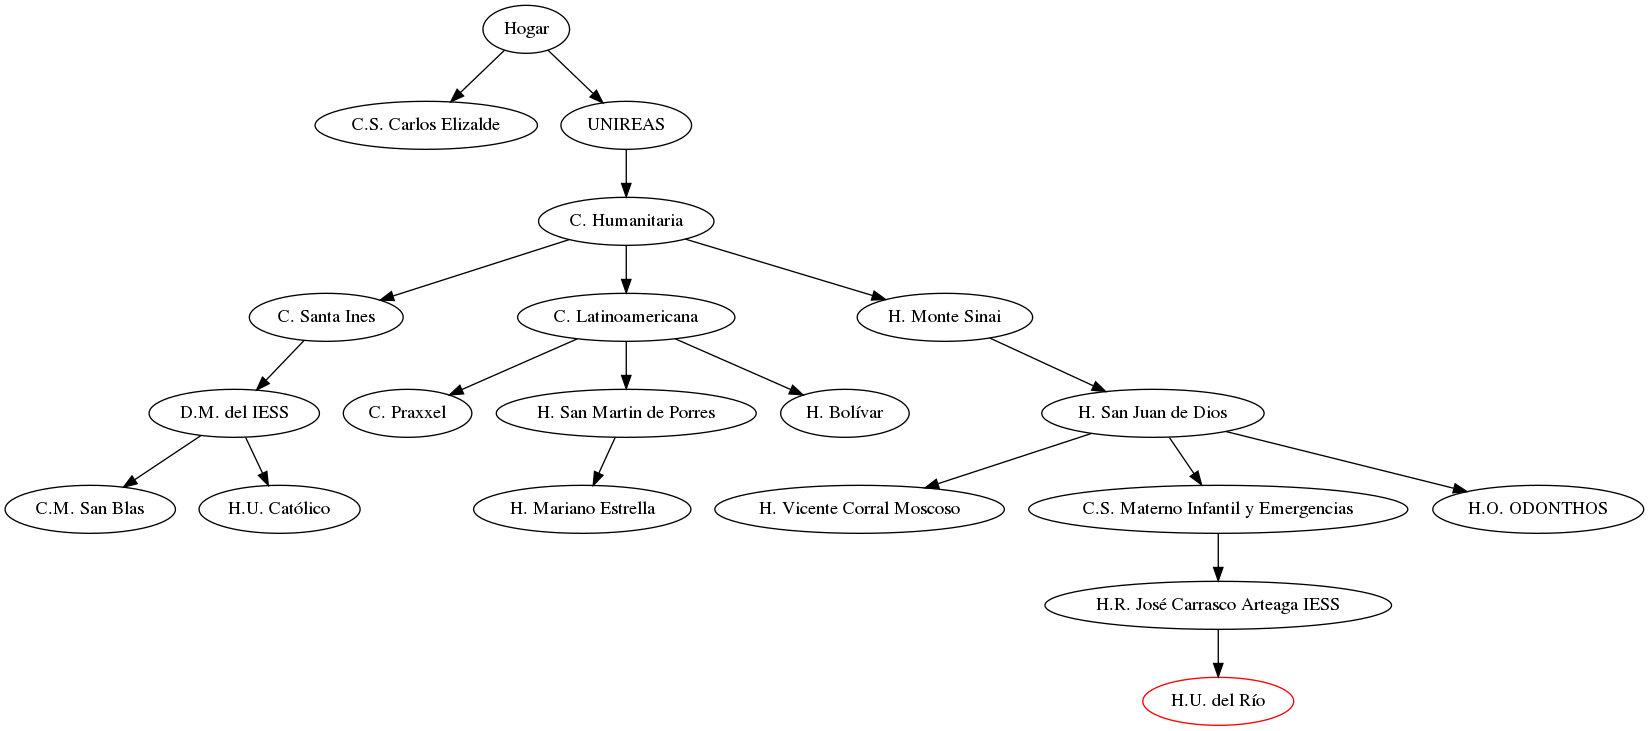

In [10]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution2(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            Grafo.add_node(node.data,color='red')
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
                    Grafo.add_edge(node.data,child)
                    if child.on_list(visited_nodes):
                        Grafo.add_node(node.data,color='red')
            node.set_child(child_list)

hospitales = {
        'Hogar': {'C.S. Carlos Elizalde', 'UNIREAS'},
        'UNIREAS': {'C. Humanitaria','Hogar'},
        'C.S. Carlos Elizalde': {'Hogar'},
        'C. Humanitaria': {'C. Latinoamericana','C. Santa Ines','H. Monte Sinai','UNIREAS'},
        'C. Latinoamericana': {'H. Bolívar','H. San Martin de Porres','C. Praxxel','C. Humanitaria'},
        'C. Santa Ines': {'D.M. del IESS', 'C. Humanitaria'},
        'H. Monte Sinai': {'H. San Juan de Dios', 'C. Humanitaria'},
        'H. Bolívar':{'C. Latinoamericana'},
        'H. San Martin de Porres': {'H. Mariano Estrella', 'C. Latinoamericana'},
        'C. Praxxel': {'C. Latinoamericana'},
        'D.M. del IESS': {'C.M. San Blas', 'H.U. Católico','C. Santa Ines'},
        'H. San Juan de Dios': {'H.O. ODONTHOS', 'H. Vicente Corral Moscoso', 'C.S. Materno Infantil y Emergencias', 'H. Monte Sinai'},
        'H. Mariano Estrella': {'H. San Martin de Porres'},
        'C.M. San Blas': {'D.M. del IESS'},
        'H.U. Católico': {'D.M. del IESS'},
        'H.O. ODONTHOS': {'H. San Juan de Dios'},
        'H. Vicente Corral Moscoso': {'H. San Juan de Dios'},
        'C.S. Materno Infantil y Emergencias': {'H.R. José Carrasco Arteaga IESS','H. San Juan de Dios'},
        'H.R. José Carrasco Arteaga IESS': {'H.U. del Río','C.S. Materno Infantil y Emergencias'},
        'H.U. del Río': {'H.R. José Carrasco Arteaga IESS'}
    }

graficar(hospitales)

init_state = 'Hogar'
solution = 'H.U. del Río'
solution_node = search_Amplitud_solution2(hospitales, init_state, solution)
# mostrar resultado
result = []
node = solution_node
if node is not None: 
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
else:
    print("No hay solucion !!!!")

graficarRes(Grafo)

Factor de Ramificación

${n=20}$ -> total de nodos

${d=7}$ -> profundidad


$${n} = \frac{b^{d+1}-1}{b-1}$$


$${20} = \frac{b^{7+1}-1}{b-1}$$

$${20} = \frac{b^{8}-1}{b-1}$$

Al resolver esto aparte tenemos que b vale aproximadamente:


$${b} = {1.25215}$$

Rta. El factor de ramificación es igual a ${1.25215}$, para el problema.

Análisis del algoritmo

Completo: si es completo.

Óptimo:si es óptimo.

Complejidad temporal y Complejidad espacial: $${O(b^d)} = {(1.25215)^{7}}$$
$${O(b^d)} = {4.82607}$$

# Conclusiones

Este metodo es muy bueno porque encuentra la solución con el menor costo y es fácil de aplicar y entender.